# US Accidents Exploratory Data Analysis

## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [52]:
# import all necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('/US_Accidents_Dec21_updated.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (31,32,33,34,35,36,37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [54]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113447,A-113448,2,2016-10-27 17:10:02,2016-10-27 23:10:02,37.310480,-121.940470,37.315610,-121.940280,0.355,At I-280/I-880 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
113448,A-113449,3,2016-10-27 17:08:44,2016-10-27 23:08:44,34.055550,-118.003720,34.037000,-118.023490,1.710,Between Valley Blvd and CA-60/Pomona Fwy - Acc...,...,False,False,False,False,False,False,Day,Day,Day,Day
113449,A-113450,4,2016-10-29 14:32:22,2016-10-29 20:32:22,45.589110,-122.756300,45.583400,-122.768300,0.702,Closed between N Portsmouth Ave and NW Bridge ...,...,False,True,True,False,False,False,Day,Day,Day,Day
113450,A-113451,4,2016-10-29 14:32:22,2016-10-29 20:32:22,45.583400,-122.768300,45.589110,-122.756300,0.702,Closed between NW Bridge Ave/St John Bridge Ap...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113452 entries, 0 to 113451
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     113452 non-null  object 
 1   Severity               113452 non-null  int64  
 2   Start_Time             113452 non-null  object 
 3   End_Time               113452 non-null  object 
 4   Start_Lat              113452 non-null  float64
 5   Start_Lng              113452 non-null  float64
 6   End_Lat                113452 non-null  float64
 7   End_Lng                113452 non-null  float64
 8   Distance(mi)           113452 non-null  float64
 9   Description            113452 non-null  object 
 10  Number                 22881 non-null   float64
 11  Street                 113452 non-null  object 
 12  Side                   113452 non-null  object 
 13  City                   113435 non-null  object 
 14  County                 113452 non-nu

In [56]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,113452.000000,113452.000000,113452.000000,113452.000000,113452.000000,113452.000000,22881.000000,110828.000000,19673.000000,110694.000000,111420.000000,110440.000000,94093.000000,14249.000000
mean,2.442760,37.061457,-91.726334,37.061514,-91.726099,0.786576,6734.523098,62.641554,27.489041,65.992664,30.018210,9.301911,8.976839,0.064834
std,0.707317,4.917990,15.833986,4.918122,15.834050,1.896254,12719.796533,19.469284,17.380832,21.122784,0.340669,3.183201,5.990122,0.472982
min,2.000000,25.129476,-124.422615,25.130927,-124.422706,0.000000,1.000000,-20.200000,-41.500000,4.000000,2.990000,0.000000,0.000000,0.000000
25%,2.000000,33.715841,-97.320302,33.716403,-97.319900,0.149000,956.000000,50.000000,18.000000,51.000000,29.920000,10.000000,5.800000,0.000000
50%,2.000000,38.238343,-87.593320,38.238210,-87.593916,0.405000,3299.000000,64.900000,29.000000,67.000000,30.030000,10.000000,8.100000,0.010000
75%,3.000000,40.893146,-80.206500,40.893130,-80.206780,0.728000,8385.000000,77.500000,37.200000,84.000000,30.140000,10.000000,11.500000,0.040000
max,4.000000,48.996014,-67.849851,48.995970,-67.849870,151.525000,851799.000000,129.200000,101.000000,100.000000,30.920000,111.000000,822.800000,10.020000


In [57]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

Percentage of missing values per column

In [58]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Precipitation(in)        0.874405
Wind_Chill(F)            0.826596
Number                   0.798320
Wind_Speed(mph)          0.170636
Visibility(mi)           0.026549
Weather_Condition        0.025482
Humidity(%)              0.024310
Temperature(F)           0.023129
Pressure(in)             0.017911
Wind_Direction           0.009749
Weather_Timestamp        0.009616
Airport_Code             0.001684
Timezone                 0.000679
Zipcode                  0.000573
Sunrise_Sunset           0.000159
Civil_Twilight           0.000159
Nautical_Twilight        0.000159
Astronomical_Twilight    0.000159
City                     0.000150
Crossing                 0.000009
Give_Way                 0.000009
Turning_Loop             0.000009
Traffic_Signal           0.000009
Traffic_Calming          0.000009
Stop                     0.000009
Station                  0.000009
Roundabout               0.000009
Railway                  0.000009
No_Exit                  0.000009
Junction      

In [59]:
type(missing_percentages)

pandas.core.series.Series

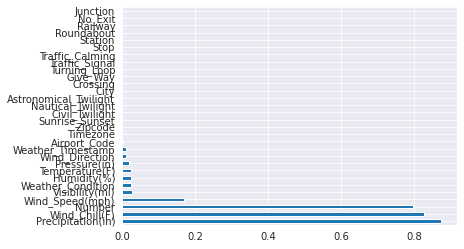

In [60]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Remove columns that you don't want to use.

## Exploratory Analysis and Visualization

Columns we'll analyze:

1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

In [61]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### City

In [62]:
df.City

0             Dublin
1             Dayton
2         Cincinnati
3              Akron
4         Cincinnati
             ...    
113447      San Jose
113448     La Puente
113449      Portland
113450      Portland
113451       Oakland
Name: City, Length: 113452, dtype: object

In [63]:
cities = df.City.unique()
len(cities)

5891

In [64]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Houston           3268
Charlotte         3014
Dallas            2990
Chicago           1952
Miami             1897
                  ... 
Dickson              1
Sheffield Lake       1
Abington             1
Haverford            1
Lakehead             1
Name: City, Length: 5890, dtype: int64

In [65]:
cities_by_accident[:20]

Houston        3268
Charlotte      3014
Dallas         2990
Chicago        1952
Miami          1897
Los Angeles    1803
Atlanta        1207
Orlando        1197
Kansas City    1147
Minneapolis    1144
Saint Louis    1056
Phoenix        1006
Saint Paul      866
Columbus        820
Detroit         807
Bronx           779
San Diego       774
Fort Worth      732
Milwaukee       695
Sacramento      671
Name: City, dtype: int64

In [66]:
type(cities_by_accident)

pandas.core.series.Series

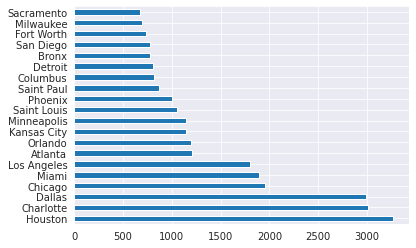

In [67]:
cities_by_accident[:20].plot(kind='barh')

In [68]:
import seaborn as sns
sns.set_style("darkgrid")

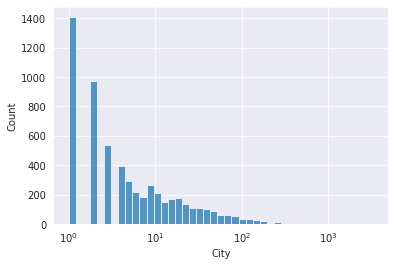

In [69]:
sns.histplot(cities_by_accident, log_scale=True)

In [70]:
cities_by_accident[cities_by_accident == 1]

Lacey             1
Hartsdale         1
Othello           1
Grapeview         1
Carnation         1
                 ..
Dickson           1
Sheffield Lake    1
Abington          1
Haverford         1
Lakehead          1
Name: City, Length: 1408, dtype: int64

### Start Time

In [71]:
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                 ...         
113447    2016-10-27 17:10:02
113448    2016-10-27 17:08:44
113449    2016-10-29 14:32:22
113450    2016-10-29 14:32:22
113451    2016-10-29 15:25:46
Name: Start_Time, Length: 113452, dtype: object

In [72]:
df.Start_Time = pd.to_datetime(df.Start_Time)

- Figure out how to show percentages

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


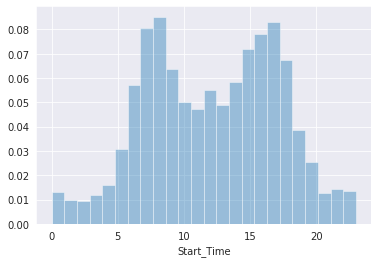

In [73]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

- A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)
- Next higest percentage is 3 pm to 6 pm.

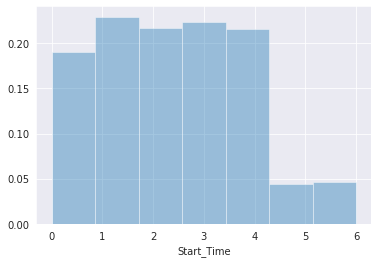

In [74]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

Is the distribution of accidents by hour the same on weekends as on weekdays.

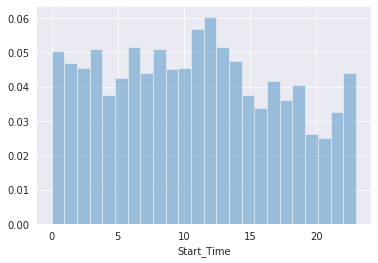

In [75]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

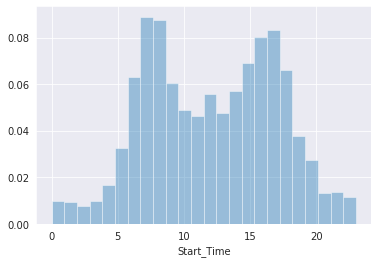

In [76]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

Can you explain the month-wise trend of accidents?

- Much data is missing for 2016. Maybe even 2017.
- There seems to be some issue with the Bing data

- Consider excluding Bing data, seems to have issues.

### Start Latitude & Longitude


In [77]:
df.Start_Lat

0         40.108910
1         39.865420
2         39.102660
3         41.062130
4         39.172393
            ...    
113447    37.310480
113448    34.055550
113449    45.589110
113450    45.583400
113451    37.802770
Name: Start_Lat, Length: 113452, dtype: float64

In [78]:
df.Start_Lng

0         -83.092860
1         -84.062800
2         -84.524680
3         -81.537840
4         -84.492792
             ...    
113447   -121.940470
113448   -118.003720
113449   -122.756300
113450   -122.768300
113451   -122.288570
Name: Start_Lng, Length: 113452, dtype: float64

In [79]:
sample_df = df.sample(int(0.1 * len(df)))

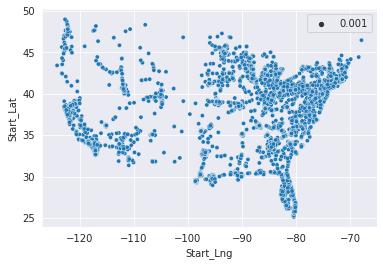

In [80]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [81]:
import folium

In [82]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [83]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

35195    26.225250
58955    41.837430
49526    38.375778
34110    42.266720
76537    25.925120
           ...    
81699    25.942235
21227    39.068630
53970    35.616632
38291    38.816273
9512     34.017860
Name: Start_Lat, Length: 100, dtype: float64
35195    -80.136270
58955    -87.669320
49526    -81.753148
34110    -79.737030
76537    -80.209490
            ...    
81699    -80.182045
21227    -94.510910
53970    -77.979277
38291    -76.915842
9512    -118.145270
Name: Start_Lng, Length: 100, dtype: float64


In [84]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [85]:
from folium.plugins import HeatMap

In [86]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [87]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Summary and Conclusion


Insights:
- No data from New York
- The number of accidents per city decreases exponentially
- Less than 5% of cities have more than 1000 yearly accidents.
- Over 1200 cities have reported just one accident (need to investigate)


In [91]:
!pip install gdown


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
